1. Write a python program which searches all the product under a particular product from www.amazon.in. The product name to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars

In [1]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [34]:
# Now lets connect the webdriver
browser=webdriver.Chrome(r"C://Users/hp/Downloads/chromedriver_win32/chromedriver.exe")

In [3]:
keyword=input("Enter item to be searched\n")

Enter item to be searched
guitars


In [4]:
browser.get("https://www.amazon.in/")

In [5]:
#locating the search bar
search_bar=browser.find_element_by_id("twotabsearchtextbox")                  #Locating search bar by id
search_bar.clear()                                                           #Clearing the search bar text
search_bar.send_keys(keyword)                                                #Sending user input to search bar
search_button = browser.find_element_by_xpath('//span[@id="nav-search-submit-text"]')       #Locating search_button by xpath
search_button.click()

2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [6]:
#creating the empty list
Title=[]
Ratings=[]
price=[]
Rated=[]
Delivery=[]
images=[]

In [7]:
prices=browser.find_elements_by_xpath("//span[@class='a-price-whole']")
for i in prices:
    price.append(i.text)
titles=browser.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']")
for i in titles:
    Title.append(i.text)

In [9]:
price

['2,499',
 '2,369',
 '2,490',
 '2,499',
 '2,349',
 '7,949',
 '',
 '4,799',
 '2,090',
 '2,369',
 '2,499',
 '2,369',
 '2,499',
 '2,499',
 '4,009',
 '3,790',
 '2,240',
 '2,349',
 '2,499',
 '2,369',
 '3,329',
 '2,399',
 '3,450',
 '2,490',
 '1,979',
 '1,319',
 '969',
 '969',
 '749',
 '3,179',
 '3,699',
 '4,009',
 '3,179',
 '2,399',
 '2,799',
 '4,890',
 '3,499',
 '899']

In [10]:
Title

['Juârez Acoustic Guitar, 38 Inch Cutaway, 038C with Bag, Strings, Pick and Strap, Black',
 'Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway with Bag (TBS Transparent Blue Sunburst)',
 'Intern INT-38C Acoustic Guitar Kit, With Bag, Strings, Pick And Strap, Black',
 'Kadence Frontier Series, Acoustic Guitar With/Wihtout EQ Die Cast Keys Combo (Bag,strap,strings and 3 picks) (Brown, Acoustic)',
 'Intern 38-inch Cutaway Design Black Acoustic Guitar with Picks & Carry Bag',
 'Juarez Acoustic Guitar, 38 Inch Curved Body Cutaway, 38CUR with Bag, Strings, Pick and Strap, Black',
 'Juarez Acoustic Guitar, 38 Inch Cutaway, 38CMB with Bag, Strings, Pick and Strap, Matte Black',
 'Juarez Acoustic Guitar, 38 Inch Cutaway with Pick Guard, 38C/RDS with Bag, Strings, Pick and Strap, Red Sunburst',
 'Juârez JRZ38C/WH 6 Strings Acoustic Guitar 38 Inch Cutaway, Right Handed, White with Bag, Strings, Picks and Strap',
 'JUAREZ JRZ38C Right Handed Acoustic Guitar (Sunburst, 6 Strings)',
 'JUAREZ Fiésta 41 

In [11]:
urls=browser.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))
for url in UR:
    browser.get(url)
    try:
        deliveries=browser.find_element_by_xpath("//div[@class='a-section a-spacing-mini']")
        Delivery.append(deliveries.text)
        rate=browser.find_element_by_xpath("//span[@id='acrCustomerReviewText']")
        rate.click()
        rating=browser.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
        Ratings.append(rating.text)
        rates=browser.find_element_by_xpath("//span[@class='a-size-base a-color-secondary']")
        Rated.append(rates.text)
    except NoSuchElementException   as e:
        Ratings.append("NO rating")#appending the No rating if no rating is there
        Rated.append("No rating")
        brands.append("No rating")
        Delivery.append("No rating")

In [12]:
url="https://www.amazon.in/s?k=guitar&ref=nb_sb_noss"
browser.get(url)
urls=browser.find_elements_by_xpath("//img[@class='s-image']")
images=[]
for i in urls:
    images.append(i.get_attribute('src'))
for url in images:
    browser.get(url)
    

In [14]:
Ratings

['3.9 out of 5',
 '4 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.9 out of 5',
 '3.7 out of 5',
 '3.9 out of 5',
 '3.6 out of 5',
 '3.9 out of 5',
 '3.8 out of 5',
 '4 out of 5',
 '3.6 out of 5',
 '4.1 out of 5',
 '4.1 out of 5',
 '4 out of 5',
 '3.8 out of 5',
 '3.5 out of 5',
 '2.7 out of 5',
 'NO rating',
 'NO rating',
 '3.3 out of 5',
 'NO rating',
 'NO rating',
 'NO rating',
 '1 out of 5',
 'NO rating',
 'NO rating',
 'NO rating',
 'NO rating',
 '4.1 out of 5',
 '2.9 out of 5',
 'NO rating',
 '3.9 out of 5',
 '3.9 out of 5',
 'NO rating',
 '5 out of 5',
 'NO rating',
 '4.1 out of 5',
 '3.7 out of 5',
 'NO rating',
 'NO rating',
 'NO rating',
 '3.9 out of 5',
 'NO rating',
 '5 out of 5',
 'NO rating',
 'NO rating',
 'NO rating',
 '3.8 out of 5']

In [15]:
Delivery

['This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'Ends in 00h 08m 40s',
 '',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'Ends in 00h 08m 07s',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'This item cannot be shipped to your selected delivery location. Please choose a different delivery location.',
 'This item cannot be shipped to your selec

In [16]:
Rated

['8,957 global ratings',
 '3,078 global ratings',
 '5,128 global ratings',
 '8,957 global ratings',
 '5,128 global ratings',
 '41 global ratings',
 '384 global ratings',
 '571 global ratings',
 '992 global ratings',
 '742 global ratings',
 '151 global ratings',
 '2,069 global ratings',
 '',
 '3,276 global ratings',
 '17 global ratings',
 '123 global ratings',
 '859 global ratings',
 '677 global ratings',
 '429 global ratings',
 '152 global ratings',
 '3 global ratings',
 'No rating',
 'No rating',
 '4 global ratings',
 'No rating',
 'No rating',
 'No rating',
 '1 global rating',
 'No rating',
 'No rating',
 'No rating',
 'No rating',
 '34 global ratings',
 '4 global ratings',
 'No rating',
 '95 global ratings',
 '80 global ratings',
 'No rating',
 '5 global ratings',
 'No rating',
 '13 global ratings',
 '37 global ratings',
 'No rating',
 'No rating',
 'No rating',
 '6 global ratings',
 'No rating',
 '1 global rating',
 'No rating',
 'No rating',
 'No rating',
 '31 global ratings']

In [18]:
images

['https://m.media-amazon.com/images/I/71y1TJbygLL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71xp-yTwyGL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/81rEbqDbPUL._AC_UL320_.jpg',
 'https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/cd719d0e-fd91-424a-8ce1-1a8e430c1249._CR0,0,500,500_SX50_._TTW_.jpg',
 'https://m.media-amazon.com/images/I/71y1TJbygLL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/81C3A85xSvL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/81eZuoHteFL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/61BKwRAAGkL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/41hjwSYfdmL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71qEvaRu+WL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/81cqhNCggKL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71KIim9PeXL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71IZ3iTYYzL._AC_UL320_.jpg',
 'https://m.media-amazon.com/images/I/71HgfIfySqL._AC

In [20]:
UR

['https://www.amazon.in/Juarez-Acoustic-Cutaway-038C-Strings/dp/B017NPCSLI/ref=sr_1_1?dchild=1&keywords=guitars&qid=1619459988&sr=8-1',
 'https://www.amazon.in/JUAREZ-JRZ38C-Acoustic-Sunburst-Strings/dp/B01FYYTDS6/ref=sr_1_2?dchild=1&keywords=guitars&qid=1619459988&sr=8-2',
 'https://www.amazon.in/Intern-INT-38C-Acoustic-Guitar-Black/dp/B073B6TQQY/ref=sr_1_3?dchild=1&keywords=guitars&qid=1619459988&sr=8-3',
 'https://www.amazon.in/Juarez-Acoustic-Cutaway-038C-Strings/dp/B017NPCSLI/ref=sxin_9?asc_contentid=amzn1.osa.60ae4b7d-e0a9-448c-9a85-59b559175a42.A21TJRUUN4KGV.en_IN&asc_contenttype=article&ascsubtag=amzn1.osa.60ae4b7d-e0a9-448c-9a85-59b559175a42.A21TJRUUN4KGV.en_IN&creativeASIN=B017NPCSLI&cv_ct_cx=guitars&cv_ct_id=amzn1.osa.60ae4b7d-e0a9-448c-9a85-59b559175a42.A21TJRUUN4KGV.en_IN&cv_ct_pg=search&cv_ct_we=asin&cv_ct_wn=osp-single-source-earns-comm&dchild=1&keywords=guitars&linkCode=oas&pd_rd_i=B017NPCSLI&pd_rd_r=c11f4f02-a4bf-4d30-ad47-01e5ca663242&pd_rd_w=xcjqL&pd_rd_wg=xnIhQ&pf_r

In [22]:
data=list(zip(Title,price,Ratings,Delivery,Rated,images,UR))

In [23]:
df=pd.DataFrame(data,columns=['Listing','Price','Ratings','Expected Delivery time','No of Ratings','Image URL','Listing URL'])

In [24]:
df

,Listing,Price,Ratings,Expected Delivery time,No of Ratings,Image URL,Listing URL
0,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","2,499",3.9 out of 5,This item cannot be shipped to your selected d...,"8,957 global ratings",https://m.media-amazon.com/images/I/71y1TJbygL...,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
1,"Juarez JRZ38C Acoustic Guitar, 38 Inch Cutaway...","2,369",4 out of 5,This item cannot be shipped to your selected d...,"3,078 global ratings",https://m.media-amazon.com/images/I/71xp-yTwyG...,https://www.amazon.in/JUAREZ-JRZ38C-Acoustic-S...
2,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...","2,490",3.9 out of 5,This item cannot be shipped to your selected d...,"5,128 global ratings",https://m.media-amazon.com/images/I/81rEbqDbPU...,https://www.amazon.in/Intern-INT-38C-Acoustic-...
3,"Kadence Frontier Series, Acoustic Guitar With/...","2,499",3.9 out of 5,This item cannot be shipped to your selected d...,"8,957 global ratings",https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
4,Intern 38-inch Cutaway Design Black Acoustic G...,"2,349",3.9 out of 5,Ends in 00h 08m 40s,"5,128 global ratings",https://m.media-amazon.com/images/I/71y1TJbygL...,https://www.amazon.in/Intern-INT-38C-Acoustic-...
5,"Juarez Acoustic Guitar, 38 Inch Curved Body Cu...","7,949",3.9 out of 5,,41 global ratings,https://m.media-amazon.com/images/I/81C3A85xSv...,https://www.amazon.in/RockJam-RJEG02-SK-RD-Ele...
6,"Juarez Acoustic Guitar, 38 Inch Cutaway, 38CMB...",,3.9 out of 5,This item cannot be shipped to your selected d...,384 global ratings,https://m.media-amazon.com/images/I/81eZuoHteF...,https://www.amazon.in/Kadence-Acoustica-Ash-Wo...
7,"Juarez Acoustic Guitar, 38 Inch Cutaway with P...","4,799",3.9 out of 5,This item cannot be shipped to your selected d...,571 global ratings,https://m.media-amazon.com/images/I/61BKwRAAGk...,https://www.amazon.in/Kadence-Frontier-Acousti...
8,Juârez JRZ38C/WH 6 Strings Acoustic Guitar 38 ...,"2,090",3.7 out of 5,Ends in 00h 08m 07s,992 global ratings,https://m.media-amazon.com/images/I/41hjwSYfdm...,https://www.amazon.in/Intern-38-inch-Cutaway-D...
9,JUAREZ JRZ38C Right Handed Acoustic Guitar (Su...,"2,369",3.9 out of 5,This item cannot be shipped to your selected d...,742 global ratings,https://m.media-amazon.com/images/I/71qEvaRu+W...,https://www.amazon.in/Juarez-Acoustic-Guitar-C...


3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.


In [3]:
browser.get("https://images.google.com/")

In [4]:
search_bar = browser.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("fruits")                                   # sending user input to search bar
search_button = browser.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')       # Locating search_button by xpath
search_button.click()  

In [5]:
urls=browser.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")#collecting urls of all the images
images=[]
for i in urls:
    images.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
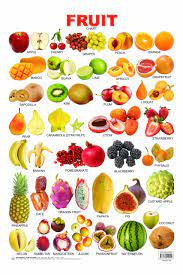
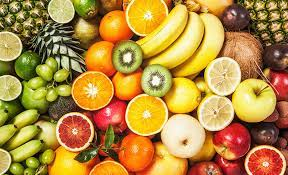
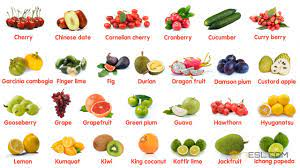
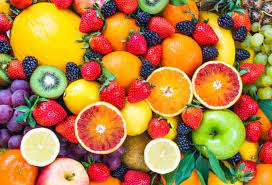
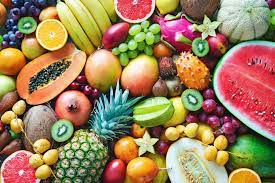
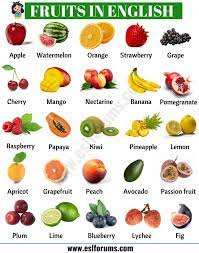
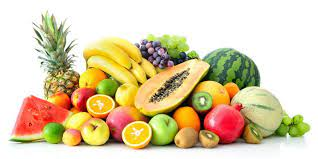
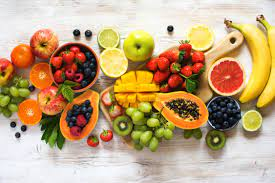
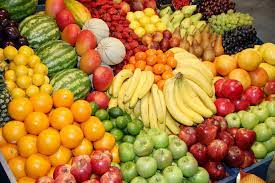
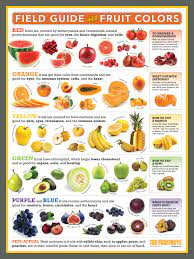
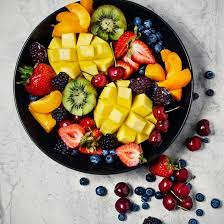
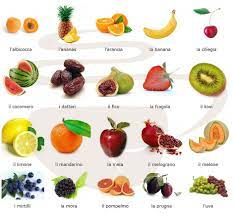
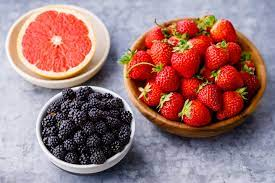
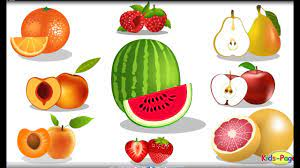
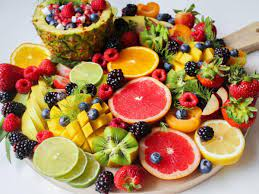
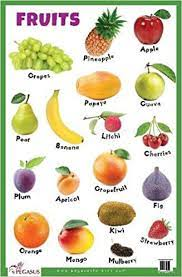
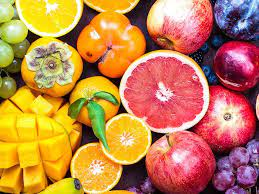
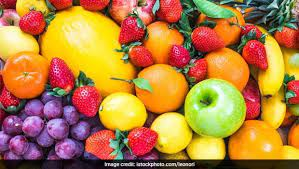
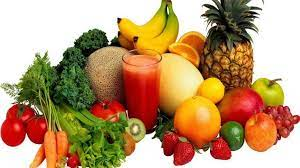
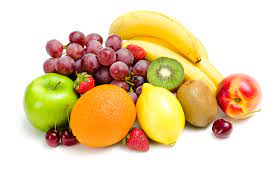

In [6]:
images

In [7]:
urls=browser.find_elements_by_xpath("//a[@class='VFACy kGQAp sMi44c lNHeqe WGvvNb']")#collecting header description of all images
headers=[]
for i in urls:
    headers.append(i.get_attribute('href'))

In [8]:
headers

['https://www.amazon.in/Fruits-All-One-Dreamland-Publications/dp/8184510594',
 'https://www.healthyeating.org/Healthy-Eating/All-Star-Foods/Fruits',
 'https://www.youtube.com/watch?v=PY2OxP_jMZ0',
 'https://www.diabetes.co.uk/food/fruit.html',
 'https://www.goodhousekeeping.com/health/diet-nutrition/g28511617/healthiest-fruits/',
 'https://www.pinterest.com/pin/useful-list-of-fruits-and-vegetables-in-english-with-esl-picture-esl-forums--650840583630938829/',
 'https://www.diagnosisdiet.com/full-article/fruit',
 'https://basket.com/blog/what-your-favorite-fruit-says-about-you/',
 'https://www.unlockfood.ca/en/Articles/Cooking-Food-Preparation/How-to-store-fruit-to-keep-them-fresh.aspx',
 'https://fruitguys.com/almanac/infographics/field-guide-fruit-colors/',
 'https://www.byrdie.com/unhealthy-fruit',
 'https://www.learn-italian-online.net/resources/basic-italian-words-2/156-frutta.html',
 'https://www.verywellhealth.com/fruits-to-avoid-if-you-have-diabetes-1087587',
 'https://www.youtub

In [10]:
data=list(zip(headers,images))

In [11]:
fruits=pd.DataFrame(data,columns=['Header','Image URL'])

In [12]:
fruits

,Header,Image URL
0,https://www.amazon.in/Fruits-All-One-Dreamland...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,https://www.healthyeating.org/Healthy-Eating/A...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,https://www.youtube.com/watch?v=PY2OxP_jMZ0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,https://www.diabetes.co.uk/food/fruit.html,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,https://www.goodhousekeeping.com/health/diet-n...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,https://www.pinterest.com/pin/useful-list-of-f...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,https://www.diagnosisdiet.com/full-article/fruit,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,https://basket.com/blog/what-your-favorite-fru...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,https://www.unlockfood.ca/en/Articles/Cooking-...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,https://fruitguys.com/almanac/infographics/fie...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [14]:
browser.get("https://images.google.com/")
search_bar = browser.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("cars")                                   # sending user input to search bar
search_button = browser.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')       # Locating search_button by xpath
search_button.click() 

In [15]:
urls=browser.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")#collecting urls of all the images of cars
images=[]
for i in urls:
    images.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
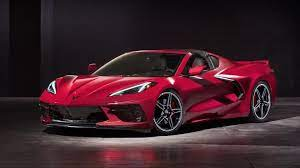
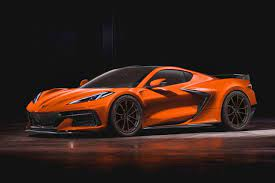
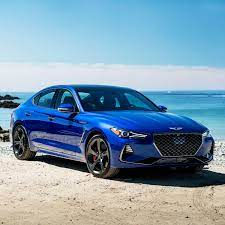
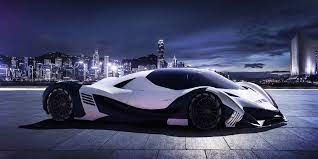
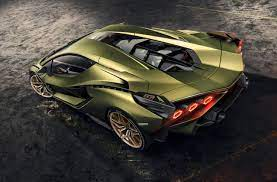
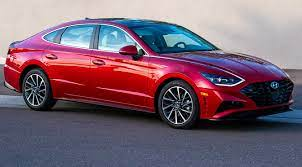
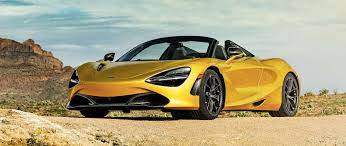
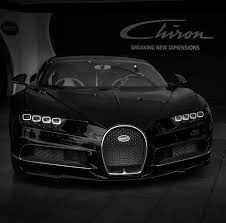
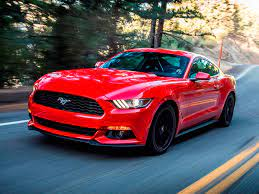
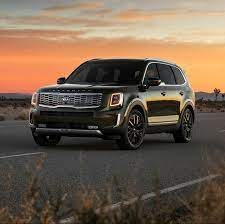
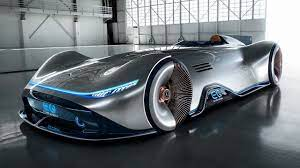
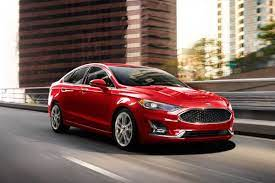
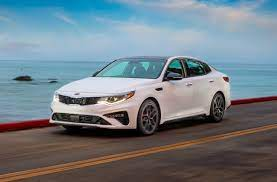
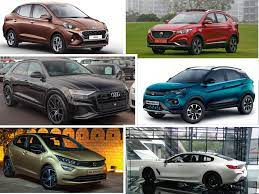
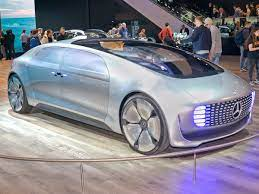
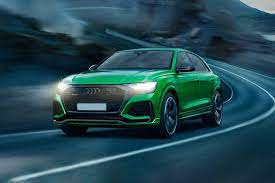
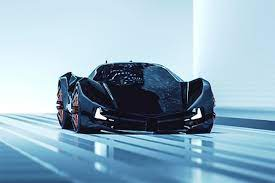
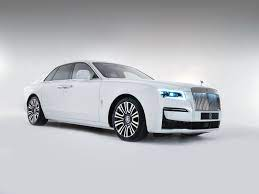
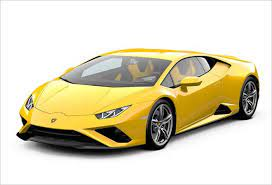
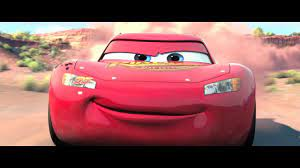

In [16]:
images

In [17]:
urls=browser.find_elements_by_xpath("//a[@class='VFACy kGQAp sMi44c lNHeqe WGvvNb']")#collecting headers
headers=[]
for i in urls:
    headers.append(i.get_attribute('href'))

In [18]:
headers

['https://www.forbes.com/sites/jimgorzelany/2019/07/23/here-are-the-coolest-new-cars-for-2020/',
 'https://www.popularmechanics.com/cars/a34824254/most-exciting-new-cars-2021/',
 'https://www.wired.com/story/jd-power-korean-cars-beat-us-europe-quality/',
 'https://luxe.digital/lifestyle/cars/fastest-cars/',
 'https://cars.usnews.com/cars-trucks/most-expensive-cars',
 'https://www.extremetech.com/extreme/303740-car-of-the-year-extremetechs-best-cars-for-2020',
 'https://www.elitetraveler.com/luxury-transport/automotive/the-best-luxury-cars-of-2019',
 'https://www.popularmechanics.com/cars/g93/the-100-hottest-cars-of-all-time/',
 'https://www.businessinsider.in/business/news/this-list-of-the-10-new-cars-owners-keep-the-longest-reveals-just-how-much-american-love-their-suvs-and-sports-cars/articleshow/71543233.cms',
 'https://www.gearpatrol.com/cars/g33835883/the-best-cars-to-buy-in-2020/',
 'https://www.youtube.com/watch?v=_adJBzQgfsg',
 'https://pv-magazine-usa.com/2020/05/19/the-future

In [ ]:
data=list(zip(headers,images))

In [19]:
cars=pd.DataFrame(data,columns=['Header','Image URL'])

In [20]:
cars

,Header,Image URL
0,https://www.amazon.in/Fruits-All-One-Dreamland...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,https://www.healthyeating.org/Healthy-Eating/A...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,https://www.youtube.com/watch?v=PY2OxP_jMZ0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,https://www.diabetes.co.uk/food/fruit.html,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,https://www.goodhousekeeping.com/health/diet-n...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,https://www.pinterest.com/pin/useful-list-of-f...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,https://www.diagnosisdiet.com/full-article/fruit,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,https://basket.com/blog/what-your-favorite-fru...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,https://www.unlockfood.ca/en/Articles/Cooking-...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,https://fruitguys.com/almanac/infographics/fie...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [21]:
browser.get("https://images.google.com/")

In [22]:
search_bar = browser.find_element_by_xpath('//input[@class="gLFyf gsfi"]')    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("machine learning")                                   # sending user input to search bar
search_button = browser.find_element_by_xpath('//span[@class="z1asCe MZy1Rb"]')       # Locating search_button by xpath
search_button.click()    

In [23]:
urls=browser.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")#collecting urls of all the images
images=[]
for i in urls:
    images.append(i.get_attribute('src'))

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
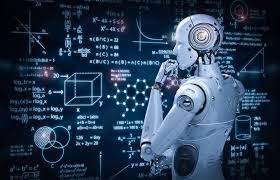
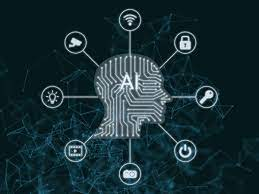
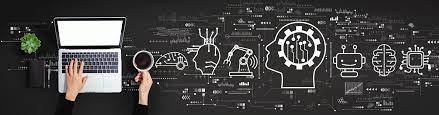
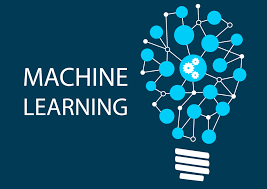
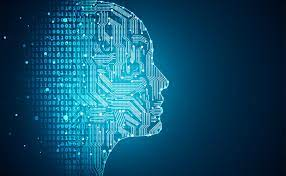
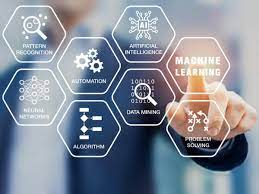
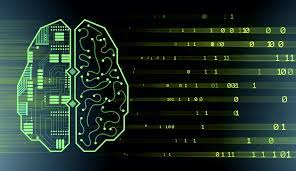
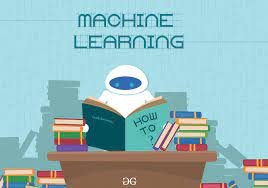
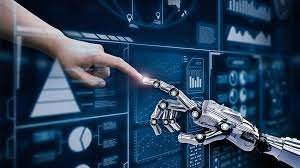
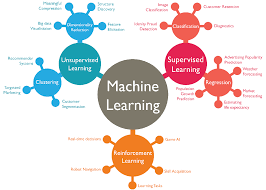
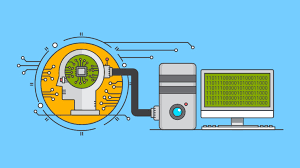
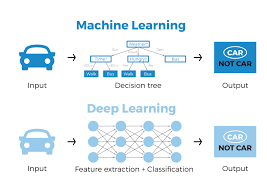
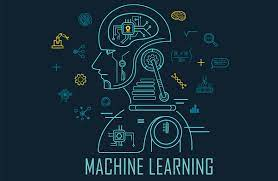
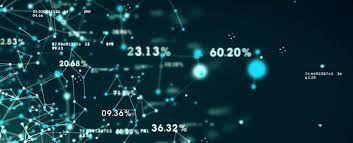
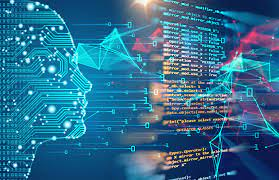
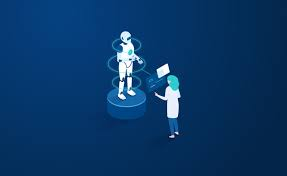
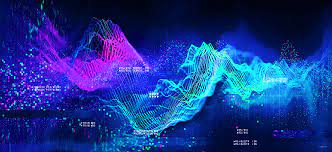
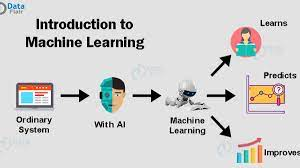
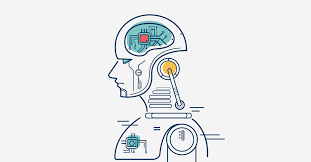
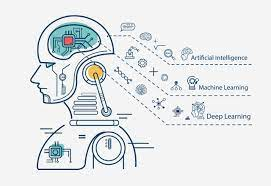

In [24]:
images

In [25]:
urls=browser.find_elements_by_xpath("//a[@class='VFACy kGQAp sMi44c lNHeqe WGvvNb']")
headers=[]
for i in urls:
    headers.append(i.get_attribute('href'))

In [26]:
headers

['https://www.forbes.com/sites/kalevleetaru/2019/01/15/why-machine-learning-needs-semantics-not-just-statistics/',
 'https://www.forbes.com/sites/tomtaulli/2019/03/02/what-you-need-to-know-about-machine-learning/',
 'https://www.expert.ai/blog/machine-learning-definition/',
 'https://www.blumeglobal.com/learning/machine-learning/',
 'https://www.ie.edu/exponential-learning/blog/data-science/machine-learning-marketing/',
 'https://www.techrepublic.com/article/machine-learning-the-smart-persons-guide/',
 'https://www.securityroundtable.org/the-growing-role-of-machine-learning-in-cybersecurity/',
 'https://www.geeksforgeeks.org/machine-learning/',
 'https://www.simplilearn.com/machine-learning-vs-deep-learning-major-differences-you-need-to-know-article',
 'https://www.wordstream.com/blog/ws/2017/07/28/machine-learning-applications',
 'https://www.iberdrola.com/innovation/machine-learning-automatic-learning',
 'https://blog.bismart.com/en/difference-between-machine-learning-deep-learning',

In [27]:
data=list(zip(headers,images))

In [28]:
ML=pd.DataFrame(data,columns=['Header','Image URL'])

In [29]:
ML

,Header,Image URL
0,https://www.forbes.com/sites/kalevleetaru/2019...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,https://www.forbes.com/sites/tomtaulli/2019/03...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,https://www.expert.ai/blog/machine-learning-de...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,https://www.blumeglobal.com/learning/machine-l...,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,https://www.ie.edu/exponential-learning/blog/d...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,https://www.techrepublic.com/article/machine-l...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,https://www.securityroundtable.org/the-growing...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,https://www.geeksforgeeks.org/machine-learning/,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,https://www.simplilearn.com/machine-learning-v...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,https://www.wordstream.com/blog/ws/2017/07/28/...,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [35]:
browser.get("https://www.flipkart.com/")

In [36]:
#locating the search bar
search_bar=browser.find_element_by_class_name('_3704LK')
search_bar.clear()
search_bar.send_keys('oneplus Nord, pixel 4A')

In [38]:
button=browser.find_element_by_class_name('L0Z3Pu')
button.click()

In [39]:
brand=[]
brands=browser.find_elements_by_class_name('_4rR01T')
for i in brands:
    brand.append(i.text)

In [40]:
brand

['Micromax Bharat 4 Plus (Black, 16 GB)',
 'I Kall K 8 NEw / K-8Plus (Red, 16 GB)',
 'SAMSUNG Galaxy S10 Plus (Ceramic White, 1 TB)',
 'LAVA Pixel V2 Plus (Black, 16 GB)',
 'LAVA Pixel V2 Plus (White, 32 GB)',
 'LAVA Pixel V2 Plus (Black, 32 GB)',
 'Micromax CANVAS 2 PLUS (jet black, 32 GB)',
 'Reach Cogent+ (Orange, 8 GB)',
 'Phicomm Clue 3 Plus VoLTE (Gold, 16 GB)',
 'Zopo Flash X Plus (Rose Gold, 32 GB)',
 'Nokia 5.1 Plus (Blue, 64 GB)']

In [41]:
ratings=[]
rating=browser.find_elements_by_class_name('_1lRcqv')#scraping description by class name = '_2mylT6'
for i in rating:
    ratings.append(i.text)

In [42]:
ratings

['3.1', '3', '4.5', '3.6', '3.6', '3.6', '3.7', '3.4', '1', '3.2', '3.8']

In [43]:
rams=[]
ram=browser.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")# scraping the discount from the xpath
for i in ram:
    rams.append(i.text)

In [44]:
rams

['2 GB RAM | 16 GB ROM',
 '2 GB RAM | 16 GB ROM',
 '12 GB RAM | 1 TB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 16 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 128 GB',
 '3 GB RAM | 32 GB ROM',
 '3 GB RAM | 32 GB ROM',
 '1 GB RAM | 8 GB ROM',
 '2 GB RAM | 16 GB ROM',
 '3 GB RAM | 32 GB ROM | Expandable Upto 128 GB',
 '6 GB RAM | 64 GB ROM']

In [45]:
inches=[]
inch=browser.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")# scraping the discount from the xpath
for i in inch:
    inches.append(i.text)

In [46]:
inches

['12.7 cm (5 inch) Display',
 '13.97 cm (5.5 inch) Display',
 '16.26 cm (6.4 inch) Quad HD+ Display',
 '12.7 cm (5 inch) Display',
 '12.7 cm (5 inch) HD Display',
 '12.7 cm (5 inch) HD Display',
 '14.48 cm (5.7 inch) Display',
 '10.16 cm (4 inch) Display',
 '12.7 cm (5 inch) Display',
 '13.97 cm (5.5 inch) Full HD Display',
 '14.73 cm (5.8 inch) Display']

In [47]:
camera=[]
cameras=browser.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")# scraping the discount from the xpath
for i in cameras:
    camera.append(i.text)

In [48]:
camera

['8MP Rear Camera',
 '5MP Rear Camera',
 '16MP + 12MP | 10MP + 8MP Dual Front Camera',
 '13MP + 13MP | 5MP + 5MP Dual Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '13MP Rear Camera',
 '3.2MP Rear Camera',
 '8MP Rear Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '13MP Rear Camera']

In [49]:
battery=[]
batteries=browser.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")# scraping the discount from the xpath
for i in batteries:
    battery.append(i.text)

In [50]:
battery

['3000 mAh Battery',
 '2200 mAh Battery',
 '4100 mAh Lithium-ion Battery',
 '2500 mAh Battery',
 '2500 mAh Battery',
 '2500 mAh Battery',
 '4000 mAh Battery',
 '2000 mAh Battery',
 '3000 mAh Battery',
 '3100 mAh Battery',
 '3060 mAh Battery']

In [51]:
warranty=[]
warranties=browser.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[5]")# scraping the discount from the xpath
for i in warranties:
    warranty.append(i.text)

In [52]:
warranty

['NA',
 '1 Year manufacturing warranty for mobile and 6 Months for accessories',
 'Exynos 9 9820 Processor',
 'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',
 '6 Month Warranty',
 '6 Month Warranty',
 '1 year',
 '1 Year Manufacturer Warranty',
 '1 Year',
 'MT6753 64-bit Processor',
 'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories']

In [53]:
price=[]
prices=browser.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")# scraping the price from the xpath
for i in prices:
    price.append(i.text)

In [54]:
price

['₹5,499',
 '₹4,170',
 '₹1,17,990',
 '₹6,199',
 '₹8,999',
 '₹7,290',
 '₹7,409',
 '₹2,290',
 '₹5,509',
 '₹4,949',
 '₹9,900']

In [55]:
data=list(zip(brand,ratings,rams,inches,camera,warranty,price))

In [56]:
flipkart=pd.DataFrame(data,columns=['Brand','RatingL','RAM','Screen size','Camera details','Warranty','Price'])

In [57]:
flipkart.to_excel('Flipkart.xls')

In [58]:
flipkart

,Brand,RatingL,RAM,Screen size,Camera details,Warranty,Price
0,"Micromax Bharat 4 Plus (Black, 16 GB)",3.1,2 GB RAM | 16 GB ROM,12.7 cm (5 inch) Display,8MP Rear Camera,NA,"₹5,499"
1,"I Kall K 8 NEw / K-8Plus (Red, 16 GB)",3,2 GB RAM | 16 GB ROM,13.97 cm (5.5 inch) Display,5MP Rear Camera,1 Year manufacturing warranty for mobile and 6...,"₹4,170"
2,"SAMSUNG Galaxy S10 Plus (Ceramic White, 1 TB)",4.5,12 GB RAM | 1 TB ROM | Expandable Upto 512 GB,16.26 cm (6.4 inch) Quad HD+ Display,16MP + 12MP | 10MP + 8MP Dual Front Camera,Exynos 9 9820 Processor,"₹1,17,990"
3,"LAVA Pixel V2 Plus (Black, 16 GB)",3.6,2 GB RAM | 16 GB ROM,12.7 cm (5 inch) Display,13MP + 13MP | 5MP + 5MP Dual Front Camera,Brand Warranty of 1 Year Available for Mobile ...,"₹6,199"
4,"LAVA Pixel V2 Plus (White, 32 GB)",3.6,3 GB RAM | 32 GB ROM | Expandable Upto 128 GB,12.7 cm (5 inch) HD Display,13MP Rear Camera | 5MP Front Camera,6 Month Warranty,"₹8,999"
5,"LAVA Pixel V2 Plus (Black, 32 GB)",3.6,3 GB RAM | 32 GB ROM,12.7 cm (5 inch) HD Display,13MP Rear Camera | 5MP Front Camera,6 Month Warranty,"₹7,290"
6,"Micromax CANVAS 2 PLUS (jet black, 32 GB)",3.7,3 GB RAM | 32 GB ROM,14.48 cm (5.7 inch) Display,13MP Rear Camera,1 year,"₹7,409"
7,"Reach Cogent+ (Orange, 8 GB)",3.4,1 GB RAM | 8 GB ROM,10.16 cm (4 inch) Display,3.2MP Rear Camera,1 Year Manufacturer Warranty,"₹2,290"
8,"Phicomm Clue 3 Plus VoLTE (Gold, 16 GB)",1,2 GB RAM | 16 GB ROM,12.7 cm (5 inch) Display,8MP Rear Camera,1 Year,"₹5,509"
9,"Zopo Flash X Plus (Rose Gold, 32 GB)",3.2,3 GB RAM | 32 GB ROM | Expandable Upto 128 GB,13.97 cm (5.5 inch) Full HD Display,13MP Rear Camera | 8MP Front Camera,MT6753 64-bit Processor,"₹4,949"


5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps

In [60]:
browser.get("https://maps.google.com/")

In [61]:
keyword=input("Enter the city to be searched\n")

Enter the city to be searched
kalyan,thane


In [64]:
search_job = browser.find_element_by_id("searchboxinput")
search_job.send_keys(keyword)

In [65]:
search_btn = browser.find_element_by_id ("searchbox-searchbutton")
search_btn.click()

In [66]:
url="https://www.google.com/maps/place/Kalyan,+Maharashtra/@19.2401584,73.0951299,13z/data=!3m1!4b1!4m5!3m4!1s0x3be796f457b1b76f:0x35df463ca445bd26!8m2!3d19.2403305!4d73.1305395"

In [67]:
browser.get(url)

In [69]:
title_tags = browser.find_elements_by_xpath("//button[@class='mapsConsumerUiCommonButton__link-like widget-reveal-card-lat-lng']")
title_tags

[]

6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –September 20) from trak.in.

In [70]:
browser.get("https://trak.in/india-startup-funding-investment-2015/")

In [71]:
title_tags = browser.find_elements_by_xpath("//div[@class='dataTables_scroll']")
title_tags

[<selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="e8c6019e-f97b-43dc-a288-e12665621e17")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="4c319b34-f5bb-420f-8fa2-cb4eef8b782f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="06add10c-8f7f-45a1-a328-6520bf6e17c2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="1ad2f833-2248-4454-bb55-24725c01c114")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="ce300627-323a-46e7-8bd5-19b996b8c113")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="b5cf8f25-c4eb-4e46-8c54-8a0bcf4b5163")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="00faaeaf-31be-4fe2-94fd-9f

In [72]:
titles=[]
for i in title_tags:
    title=i.text
    titles.append(title)

In [73]:
titles

["Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 01/04/2021 BYJU’S Edu-tech Online tutoring Bengaluru Innoven Capital Series F 460,000,000\n2 05/04/2021 Meesho E-commerce Online reselling platform Bengaluru SoftBank Vision Fund 2 Series E 300,000,000\n3 14/04/2021 Swiggy Online Food Delivery Online Food Delivery Bengaluru Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments Series J 343,000,000\n4 07/04/2021 Groww FinTech Investment platform Bengaluru MC Global Edtech, B Capital, Baron, others Series D 83,000,000\n5 14/04/2021 Beldara E-commerce Global B2B marketplace Mumbai Hindustan Media Ventures Venture 7,400,000",
 "Sr. No. Date (dd/mm/yyyy) Startup Name Industry / Vertical Sub-Vertical City / Location Investors' Name Investment Type Amount (In USD)\n1 04/03/2021 DealShare E-commerce Online shopping platform Jaipur, Rajasthan Innoven Capital Debt Financing 250,0

7. Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [74]:
browser.get("https://www.digit.in/top-products/best-laptop-for-programmers-3575.html")

In [75]:
title_tags = browser.find_elements_by_xpath("//div[@class='TopNumbeHeading active sticky-footer']")
title_tags

[<selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="61298fc5-6df3-4dc0-8774-3b9b10dce7f7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="168ae2ed-810e-4b6f-8bf2-e095459cb62f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="5c29bd89-5b55-4d23-9e9c-2715da5119f3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="5c5655d0-b0ea-4f5d-96d9-2ab4a0ddb9bb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="964c382d-b521-45b5-b1b3-c3785edc6b1c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="2b3db603-413c-4e76-a476-bc12bf505167")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="45124e35-af85-462e-adab-07

In [81]:
titles=[]
for i in title_tags:
    title=i.text.replace("\n",'')
    titles.append(title)

In [82]:
titles

['1.APPLE MACBOOK PRO 13-INCH',
 '2.ACER SWIFT 3',
 '3.DELL XPS 15',
 '4.APPLE MACBOOK PRO 16-INCH',
 '5.HP ENVY 15',
 '6.LENOVO IDEAPAD S540',
 '7.ASUS ZENBOOK 14',
 '8.HP SPECTRE X360',
 '9.MICROSOFT SURFACE BOOK 2',
 '10.ASUS ZENBOOK DUO']

In [83]:
windows_tags = browser.find_elements_by_xpath("//div[@class='product-detail']")
windows_tags

[<selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="625d669c-a7b0-43ee-9c76-3cd3e33ba952")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="98853ae2-c368-4c72-8ea2-604f6adc93e0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="3c5bbf0d-159b-48f4-ad85-f62fba7eb5a6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="7e9406e3-4f41-476e-b0d4-5293936f27ce")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="b2f17260-9cfd-4c9a-a889-7858b8d459c0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="55a88368-cfa8-4fc5-af23-e9f0c0a4aa81")>,
 <selenium.webdriver.remote.webelement.WebElement (session="97764e1d0f744341d470395c2b848bf3", element="f95d2cd6-789e-4374-a291-5c

In [84]:
productdetail=[]
for i in windows_tags:
    windows=i.text.replace("\n","")
    productdetail.append(windows)

In [85]:
productdetail

['OSNADISPLAY13 MP | NAPROCESSORNAMEMORYNA NULL/3 GBGB NULLREAD REVIEW FULL SPECS OTHER APPLE LAPTOPS',
 'OSWINDOWS 10 HOMEDISPLAY14 INCH" (1920 X 1080)PROCESSORRYZEN 5 4500U | 4.0GHZMEMORY512 GB NVME/8 GBGB LPDDR4FULL SPECS OTHER ACER LAPTOPS',
 'OSWINDOWS 10 HOMEDISPLAY15.6" (3840 X 2400)PROCESSOR10TH-GENERATION INTEL CORE I9-10885H | NAMEMORY256 GB SSD/16 GBGB DDR4FULL SPECS OTHER DELL LAPTOPS',
 'OSIOSDISPLAY16" (3072 X 1920)PROCESSORINTEL CORE I9 8TH GEN | NAMEMORY512 GB SSD/16 GBGB DDR4READ REVIEW FULL SPECS OTHER APPLE LAPTOPS',
 'OSWINDOWS 10DISPLAY15" (1920 X 1080)PROCESSORINTEL I7-10750H 10TH GEN | 2.6 GHZMEMORY1 TB SSD/16 GBGB DDR4READ REVIEW FULL SPECS OTHER HP LAPTOPS',
 'OSWINDOWS 10 HOMEDISPLAY14" (1920 X 1080)PROCESSOR8TH GEN INTEL CORE I5-8565U | 1.6 GHZMEMORY512 GB SSD/12GB DDR4FULL SPECS OTHER LENOVO LAPTOPS',
 'OSWINDOWS 10 HOMEDISPLAY14" (1920 X 1080)PROCESSOR10TH GEN INTEL CORE I5-1035G1 | 3.6 GHZMEMORY512 GB SSD/8 GBGB DDR4FULL SPECS OTHER ASUS LAPTOPS',
 'OSWIND

In [86]:
urls=browser.find_elements_by_xpath("//div[@class='product-ickon']/img")
URL=[]
for i in urls:
    URL.append(i.get_attribute('src'))

In [87]:
URL

['https://static.digit.in/product/thumb_157421_product_td_300.jpeg',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png',
 'https://www.digit.in/images/digit_topten_icon.png']

In [88]:
data=data=list(zip(titles,productdetail,URL))

In [90]:
digit=pd.DataFrame(data,columns=['Title','Product Details','Image URL'])

In [91]:
digit

,Title,Product Details,Image URL
0,1.APPLE MACBOOK PRO 13-INCH,OSNADISPLAY13 MP | NAPROCESSORNAMEMORYNA NULL/...,https://static.digit.in/product/thumb_157421_p...
1,2.ACER SWIFT 3,"OSWINDOWS 10 HOMEDISPLAY14 INCH"" (1920 X 1080)...",https://www.digit.in/images/digit_topten_icon.png
2,3.DELL XPS 15,"OSWINDOWS 10 HOMEDISPLAY15.6"" (3840 X 2400)PRO...",https://www.digit.in/images/digit_topten_icon.png
3,4.APPLE MACBOOK PRO 16-INCH,"OSIOSDISPLAY16"" (3072 X 1920)PROCESSORINTEL CO...",https://www.digit.in/images/digit_topten_icon.png
4,5.HP ENVY 15,"OSWINDOWS 10DISPLAY15"" (1920 X 1080)PROCESSORI...",https://www.digit.in/images/digit_topten_icon.png
5,6.LENOVO IDEAPAD S540,"OSWINDOWS 10 HOMEDISPLAY14"" (1920 X 1080)PROCE...",https://www.digit.in/images/digit_topten_icon.png
6,7.ASUS ZENBOOK 14,"OSWINDOWS 10 HOMEDISPLAY14"" (1920 X 1080)PROCE...",https://www.digit.in/images/digit_topten_icon.png
7,8.HP SPECTRE X360,"OSWINDOWS 10 PROFESSIONALDISPLAY13.3"" (1920X10...",https://www.digit.in/images/digit_topten_icon.png
8,9.MICROSOFT SURFACE BOOK 2,"OSWINDOWS 10 PRO CREATORSDISPLAY15"" (3240 X 21...",https://www.digit.in/images/digit_topten_icon.png
9,10.ASUS ZENBOOK DUO,"OSWINDOWS 10 HOMEDISPLAY1"" (1920 X 1080)PROCES...",https://www.digit.in/images/digit_topten_icon.png
